## Laderas inestables en la alcaldía Álvaro Obregón

En este notebook se realizará un análisis exploratorio de los datos de "laderas inestables" en la alcaldía Álvaro Obregón, Ciudad de México. Los datos fueron obtenidos del Atlas de Riesgo de la Ciudad de México. 

Fuente: https://www.atlas.cdmx.gob.mx/datosabiertos2.html

In [1]:
# Importamos las librerías necesarias
import geopandas as gpd

In [2]:
# Cargamos el geojson
gdf = gpd.read_file('data/alvaro_obregon/peligro_por_erosion.geojson')

# Ver las primeras filas
print(gdf.head())

# Ver información general
print(gdf.info())

# Ver el sistema de coordenadas (CRS)
print(gdf.crs)

   objectid  id   fenomeno taxonomia  r_p_v_e intensidad           descripcio  \
0         1   1  Geológico            Peligro       Bajo  Peligro por erosión   
1         2   2  Geológico            Peligro      Medio  Peligro por erosión   
2         3   3  Geológico            Peligro       Alto  Peligro por erosión   

                                              fuente cve_mun        alcaldia  \
0  Atlas de Peligros Naturales y Antropogénicos p...   09010  Álvaro Obregón   
1  Atlas de Peligros Naturales y Antropogénicos p...   09010  Álvaro Obregón   
2  Atlas de Peligros Naturales y Antropogénicos p...   09010  Álvaro Obregón   

            entidad      area_m2   perime_m  \
0  Ciudad de México  69026533.67  401064.82   
1  Ciudad de México  24641160.46  413036.16   
2  Ciudad de México   3350535.75   71078.32   

                                            geometry  
0  MULTIPOLYGON (((4.69e+05 2.14e+06, 4.69e+05 2....  
1  MULTIPOLYGON (((4.67e+05 2.13e+06, 4.67e+05 2....  


### Inspección de los datos espaciales
A continuación, se realizará una inspección de los datos espaciales para identificar los tipos de geometrías presentes en el archivo geojson.

In [3]:
print(gdf.geom_type.value_counts())

MultiPolygon    3
Name: count, dtype: int64


### Resumen estadístico de los datos

A continuación, se realizará un resumen estadístico de los datos no espaciales. El detalle de cada evento reportado se encuentra en la columna "detalles". Se observa que el año en que se reportó el evento se encuentra en la columna "magni_num".

In [4]:
# Analizarla columna "detalles" para ver cuantos valores únicos tiene
print(gdf["intensidad"].value_counts())

intensidad
Bajo     1
Medio    1
Alto     1
Name: count, dtype: int64


In [5]:
# Ver area en m2
print(gdf["area_m2"].value_counts())

area_m2
69026533.67    1
24641160.46    1
3350535.75     1
Name: count, dtype: int64


In [6]:
# Ver los datos faltantes
print(gdf.isnull().sum())


objectid      0
id            0
fenomeno      0
taxonomia     0
r_p_v_e       0
intensidad    0
descripcio    0
fuente        0
cve_mun       0
alcaldia      0
entidad       0
area_m2       0
perime_m      0
geometry      0
dtype: int64


### Visualización inicial de los datos
A continuación, se realizará una visualización espacial inicial de los datos. Se observa como los polígonos representan las zonas de peligro por erosión en la alcaldía Álvaro Obregón.

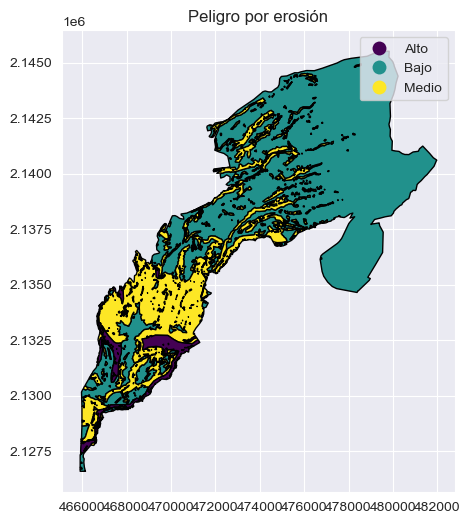

In [8]:
import matplotlib.pyplot as plt

gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black", column="intensidad", legend=True)
plt.title("Peligro por erosión")
plt.show()